In [136]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [137]:
# cwd = os.path.join(
#     os.getcwd(), 'Group Coursework Brief-20221106', 'Data_Files', 'Data_Files')
# dirName_trainData = os.path.join(cwd, 'epl-training.csv')
dirName_trainData = 'https://raw.githubusercontent.com/shabir-dhillon/GCW_0036/main/Group%20Coursework%20Brief-20221106/Data_Files/Data_Files/epl-full-training.csv'
df_epl_train = pd.read_csv(dirName_trainData)

df_epl_train["Date"] = pd.to_datetime(df_epl_train["Date"], dayfirst=True)

<ipython-input-137-2e3452c8c93b>:5: DtypeWarning: Columns (98) have mixed types. Specify dtype option on import or set low_memory=False.
  df_epl_train = pd.read_csv(dirName_trainData)


In [138]:
# print(df_epl_train)

Feature selection via SelectKBest

In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df_epl_train["Date"] = pd.to_datetime(df_epl_train["Date"])
df_epl_train["Referee"] = df_epl_train["Referee"].astype(
    "category").cat.codes
df_epl_train["AwayTeam"] = df_epl_train["AwayTeam"].astype(
    "category").cat.codes
df_epl_train["HomeTeam"] = df_epl_train["HomeTeam"].astype(
    "category").cat.codes
df_epl_train["FTR"] = df_epl_train["FTR"].astype(
    "category").cat.codes
data = df_epl_train
attributes = ["HomeTeam", "AwayTeam", "Referee", "HS", "AS", 
              "HST", "AST", "HF", "AF", "HC", "AC","HY", "AY", "HR", "AR"]

X = data.loc[:,attributes]  #independent columns
y = data.loc[:,"FTR"]    #target column i.e price range#apply SelectKBest class to extract top 19 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['attributes','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 19 best features

   attributes        Score
5         HST  1400.378885
6         AST  1306.788544
4          AS  1029.022008
3          HS   769.813657
1    AwayTeam   246.933218
0    HomeTeam   229.505270
13         HR   146.649342
11         HY   121.695292
14         AR    74.798805
2     Referee    54.538823


feature selection via feature importance

[0.07655357 0.07598967 0.07211619 0.07760434 0.08007063 0.10171024
 0.09132637 0.07174029 0.07164222 0.07157147 0.06988342 0.05493007
 0.05793271 0.01411013 0.01281868]


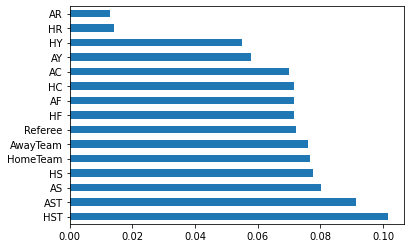

In [140]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X, y)
# use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

feature selection via correlation matrix with heatmap

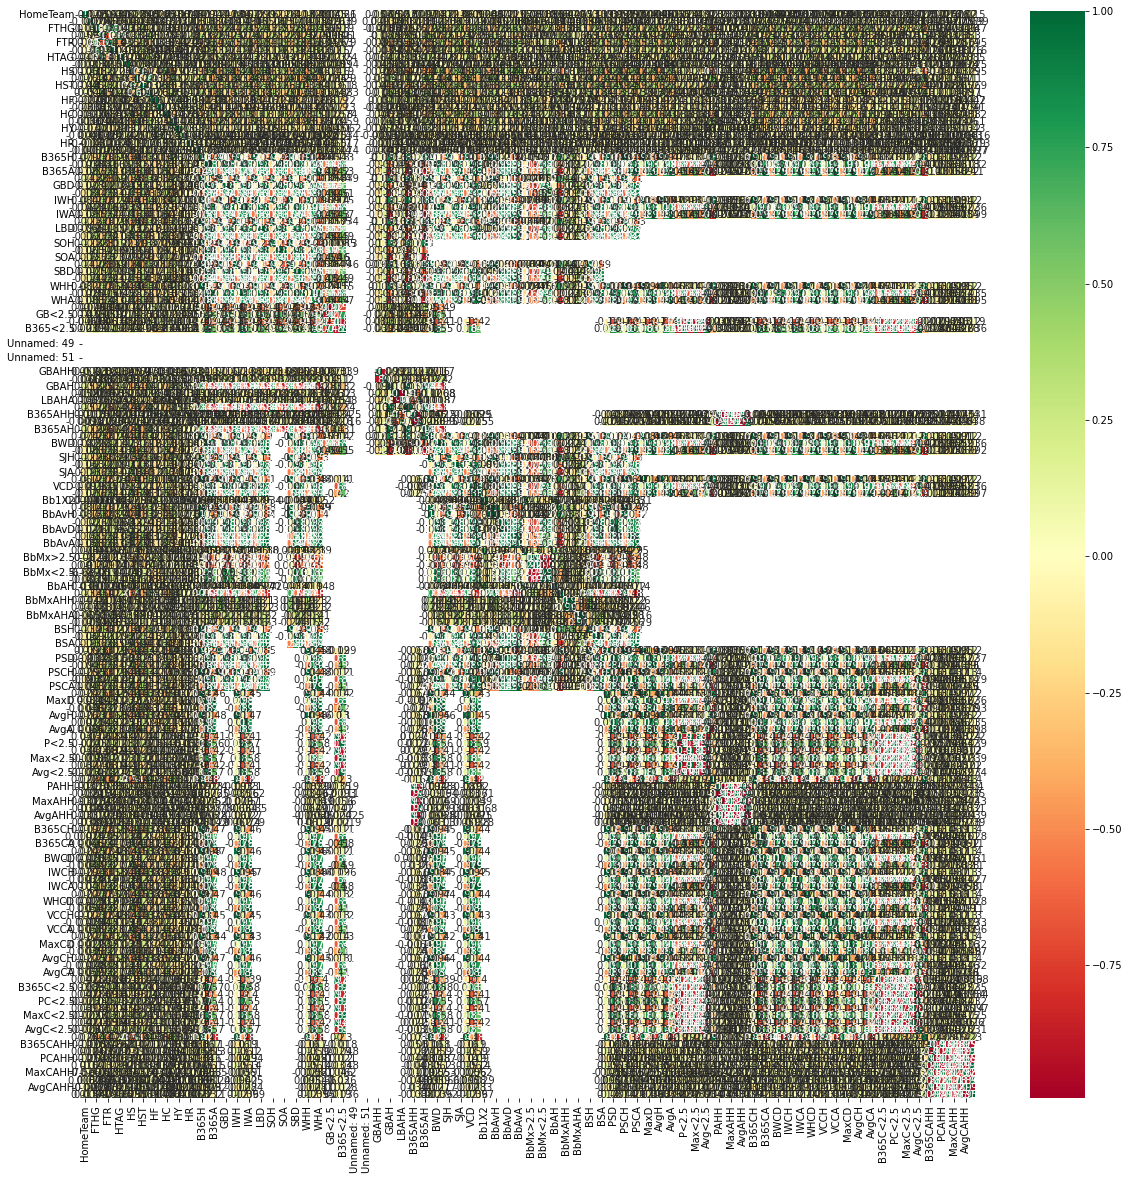

In [141]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")